<a href="https://colab.research.google.com/github/samsoe/matrix/blob/master/Gridpoint_and_Precipitation_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [0]:
library(dplyr)
library(ggplot2)

In [0]:
data = read.csv("https://drive.google.com/uc?id=1LX1iFFkKi4V9YjFVMsansk4-i3rSrqbv")

In [0]:
tail(data, 4)

,year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long
,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2078,2018,481,Riparian,9.56000,fall,2018 Q4,7.381667,5.138333,46.70958,-114.0447
2079,2018,482,Riparian,0.00000,fall,2018 Q4,7.381667,5.138333,46.70839,-114.0406
2080,2018,484,Riparian,13.00667,fall,2018 Q4,7.381667,5.138333,46.70708,-114.0436
2081,2018,571,Active,12.40000,fall,2018 Q4,7.381667,5.138333,46.71035,-114.0388


In [0]:
# show only fall season is selected
unique(data$season)

[1] fall
Levels: fall

# Explore All Sampled Grid Points

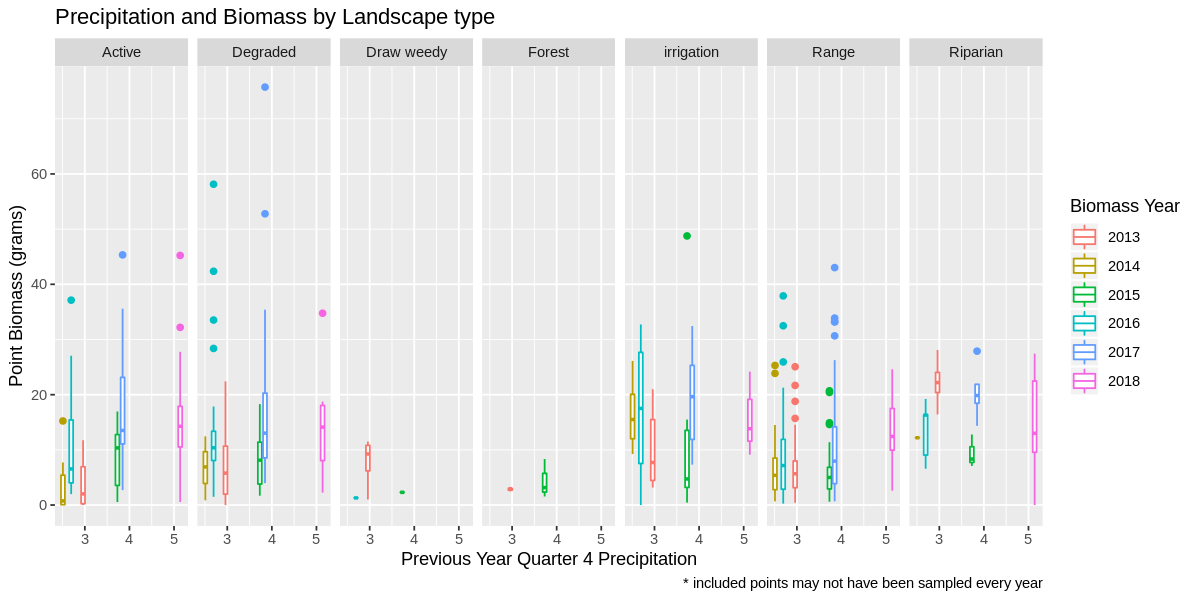

In [0]:
# All points
options(repr.plot.width=10, repr.plot.height=5)

subset(data, !is.na(pt_avg_grams) & year > 2012) %>%
  ggplot(height = 250, aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams, group = year, color = as.character(year))) +
  geom_boxplot() +
  facet_wrap(. ~ type, nrow = 1) +
  labs(x = "Previous Year Quarter 4 Precipitation", y = "Point Biomass (grams)", colour = "Biomass Year", title = "Precipitation and Biomass by Landscape type",
      caption = "* included points may not have been sampled every year")

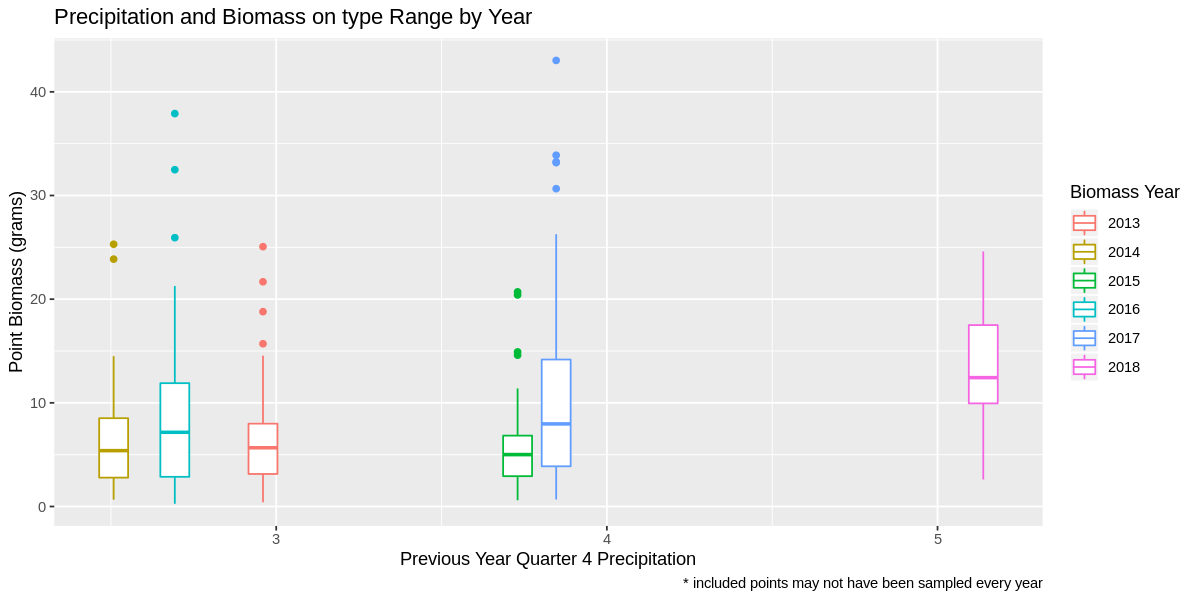

In [0]:
options(repr.plot.width=10, repr.plot.height=5)

subset(data, !is.na(pt_avg_grams) & year >= 2013) %>% 
  filter(type == "Range") %>%
  ggplot(aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams, color = as.character(year))) + 
  geom_boxplot() +
  labs(x = "Previous Year Quarter 4 Precipitation", y = "Point Biomass (grams)", colour = "Biomass Year", title = "Precipitation and Biomass on type Range by Year",
      caption = "* included points may not have been sampled every year")

# Gridpoints Sampled Every Year

## All landscape types

In [0]:
# select for points sampled every year
all_points <- data %>% filter(!is.na(pt_avg_grams))
x <- split(all_points$gridpt, all_points$year)
y <- Reduce(intersect, x)

In [0]:
all_types <- data[data$gridpt %in% y,]

In [0]:
# list of points sampled every year
consistent_gridpts_all <- unique(all_types$gridpt)
consistent_gridpts_all

[1]  71  86  87 107 108 121 189 199 225 240 241 243 245 304 328

In [0]:
# landscape types with consistent point sampled every year
consistent_gridpts_all_type <- unique(all_types$type)
consistent_gridpts_all_type

[1] Active     Degraded   Range      irrigation
Levels: Active Degraded Draw weedy Forest irrigation Range Riparian

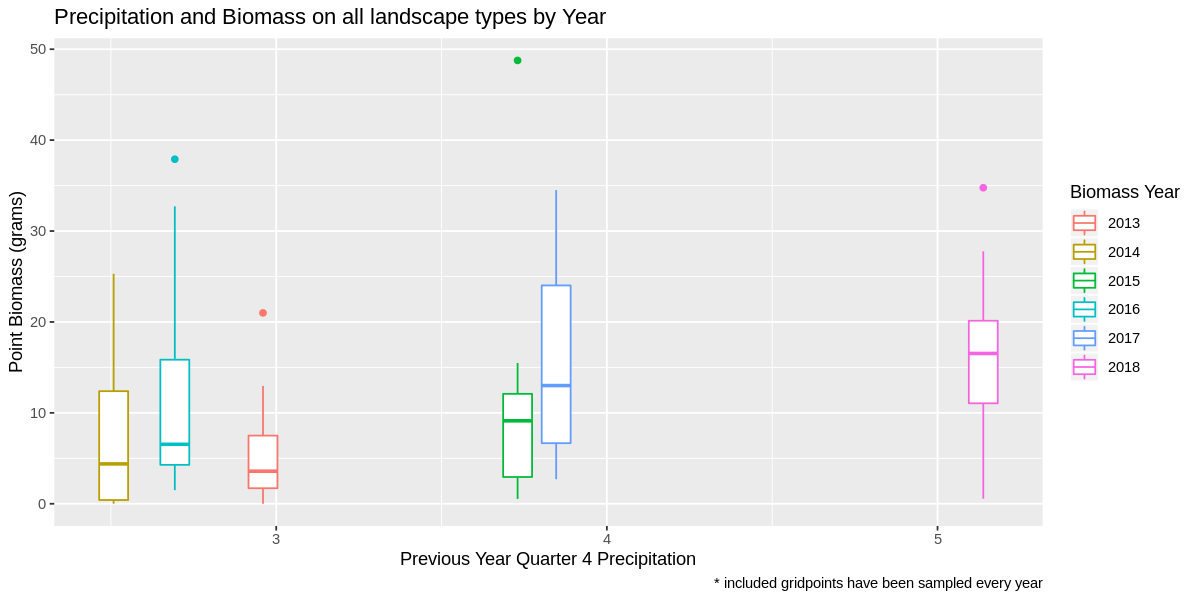

In [0]:
subset(all_types, year >= 2013) %>% 
  ggplot(aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams, color = as.character(year))) + 
  geom_boxplot() +
  labs(x = "Previous Year Quarter 4 Precipitation", y = "Point Biomass (grams)", colour = "Biomass Year", title = "Precipitation and Biomass on all landscape types by Year",
    caption = "* included gridpoints have been sampled every year")

## Range Landscape Type

In [0]:
# select for range points sampled every year
r <- data %>% filter(type == "Range" & !is.na(pt_avg_grams))
x <- split(r$gridpt, r$year)
y <- Reduce(intersect, x)

In [0]:
consistent_range_pts <- data[data$gridpt %in% y,]

In [0]:
unique(consistent_range_pts$gridpt)

[1] 199 240

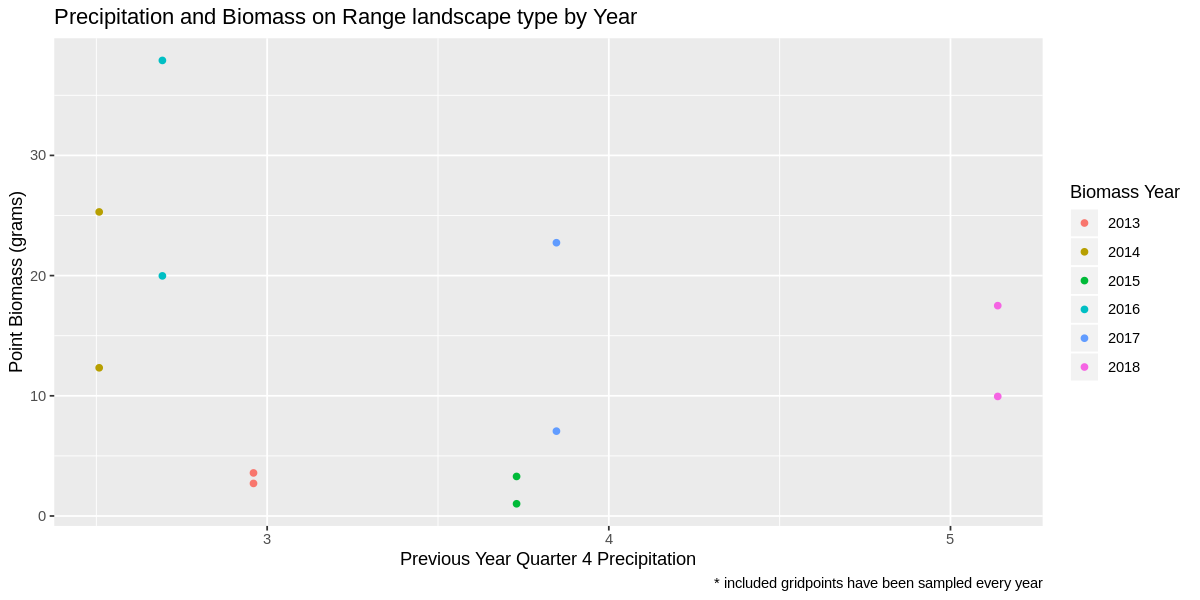

In [0]:
subset(consistent_range_pts, year >= 2013) %>% 
  ggplot(aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams,  color = as.character(year))) + 
  geom_point() +
  labs(x = "Previous Year Quarter 4 Precipitation", y = "Point Biomass (grams)", colour = "Biomass Year", title = "Precipitation and Biomass on Range landscape type by Year",
    caption = "* included gridpoints have been sampled every year")

# Current year’s spring qtr precipitation on the x axis and biomass on y 

In [0]:
# Load yearly sum precip
yearly_sum <- read.csv("https://drive.google.com/uc?id=1_BkGa71GP4yvOiBxKfDsHJikoKLmH0Rn")

In [0]:
head(yearly_sum)

X,year,mean
<int>,<int>,<dbl>
1,2013,6.118333
2,2014,10.820000
3,2015,9.183333
4,2016,11.490000
5,2017,12.668333
6,2018,13.968333


In [0]:
# Load MPG Spring Quarter precip and biomass
spring <- read.csv("https://drive.google.com/uc?id=1XsIqtSmz0gJARVHKtsCPY0v6zIx-4xrs")

In [22]:
head(spring)

year,gridpt,season,type,pt_avg_grams,lat,long,precip_qtr,ave
<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2013,203,spring,Range,0.7900000,46.68870,-114.0157,2013 Q2,2.508333
2013,19,spring,Range,0.7233333,46.71957,-114.0247,2013 Q2,2.508333
2013,89,spring,Range,4.3533333,46.70282,-114.0298,2013 Q2,2.508333
2013,75,spring,Degraded,3.0133333,46.70811,-114.0080,2013 Q2,2.508333
2013,289,spring,Degraded,0.4400000,46.67812,-114.0259,2013 Q2,2.508333
2013,138,spring,Degraded,6.8433333,46.69620,-114.0278,2013 Q2,2.508333


In [24]:
class(spring)

[1] "data.frame"

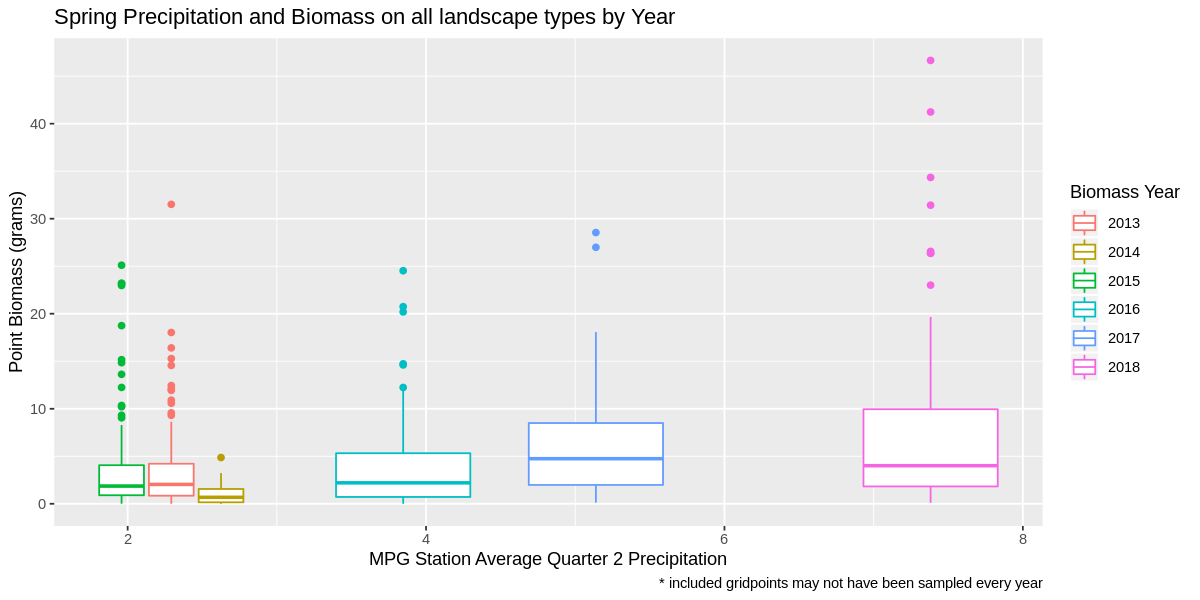

In [31]:
options(repr.plot.width=10, repr.plot.height=5)

spring %>% ggplot(aes(x = ave, y = pt_avg_grams, color = as.character(year))) + 
  geom_boxplot(width = 1) +
  labs(x = "MPG Station Average Quarter 2 Precipitation", y = "Point Biomass (grams)", colour = "Biomass Year", title = "Spring Precipitation and Biomass on all landscape types by Year",
    caption = "* included gridpoints may not have been sampled every year")

### Points sampled every year

In [0]:
# select for points sampled every year
all_points <- spring %>% filter(!is.na(pt_avg_grams))
x <- split(all_points$gridpt, all_points$year)
y <- Reduce(intersect, x)

all_types_spring <- spring[spring$gridpt %in% y,]

In [35]:
head(all_types_spring)

,year,gridpt,season,type,pt_avg_grams,lat,long,precip_qtr,ave
,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2,2013,19,spring,Range,0.7233333,46.71957,-114.0247,2013 Q2,2.508333
19,2013,241,spring,irrigation,1.2700000,46.68164,-114.0336,2013 Q2,2.508333
20,2013,306,spring,Degraded,2.5533333,46.67768,-114.0125,2013 Q2,2.508333
34,2013,121,spring,Degraded,2.9633333,46.69752,-114.0349,2013 Q2,2.508333
39,2013,20,spring,Range,7.5233333,46.72002,-114.0215,2013 Q2,2.508333
61,2013,86,spring,Active,2.3600000,46.70149,-114.0393,2013 Q2,2.508333


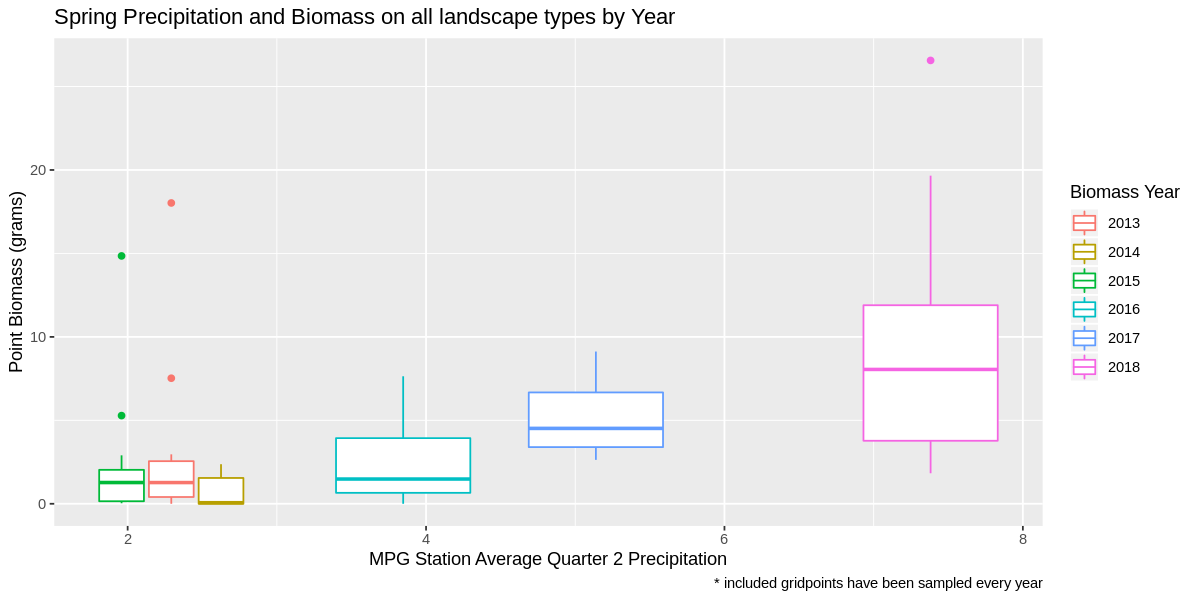

In [38]:
options(repr.plot.width=10, repr.plot.height=5)

all_types_spring %>% ggplot(aes(x = ave, y = pt_avg_grams, color = as.character(year))) + 
  geom_boxplot(width = 1) +
  labs(x = "MPG Station Average Quarter 2 Precipitation", y = "Point Biomass (grams)", colour = "Biomass Year", title = "Spring Precipitation and Biomass on all landscape types by Year",
    caption = "* included gridpoints have been sampled every year")

# Cumulative Biomass as a function of previous year Cumulative Precipitation

### Load Biomass

In [0]:
# load biomass
src <- "https://drive.google.com/uc?id=1gzpnX019uG9YoS4ZQOQEyf4OTuLPIHgT"
biomass <- read.csv(src, stringsAsFactors=FALSE)

In [13]:
glimpse(biomass)

Observations: 3,953
Variables: 7
$ gridpt       <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,…
$ year         <int> 2011, 2010, 2017, 2016, 2016, 2015, 2015, 2014, 2014, 20…
$ season       <chr> "fall", "fall", "spring", "fall", "spring", "fall", "spr…
$ type         <chr> "Range", "Range", "Range", "Range", "Range", "Range", "R…
$ pt_avg_grams <dbl> 8.990000, NA, 3.326667, 21.273333, 2.780000, 6.873333, 1…
$ lat          <dbl> 46.72972, 46.72972, 46.72972, 46.72972, 46.72972, 46.729…
$ long         <dbl> -114.0010, -114.0010, -114.0010, -114.0010, -114.0010, -…


### Load Cumulative Precipitation


* notebook:  [precip_cumulative.ipynb](https://colab.research.google.com/drive/1n3DXpYBVWhtC5jAwmyfOt80KEeFYFEn8#scrollTo=xZ51lnZ4NP7K)
  * output: [MPG_yearly_precipitation.csv](https://drive.google.com/uc?id=1_BkGa71GP4yvOiBxKfDsHJikoKLmH0Rn)



In [0]:
# load precipitation
precip_src <- "https://drive.google.com/uc?id=1_BkGa71GP4yvOiBxKfDsHJikoKLmH0Rn"
precip_dat <- read.csv(precip_src)

In [37]:
glimpse(precip_dat)

Observations: 6
Variables: 3
$ X    <int> 1, 2, 3, 4, 5, 6
$ year <int> 2013, 2014, 2015, 2016, 2017, 2018
$ mean <dbl> 6.118333, 10.820000, 9.183333, 11.490000, 12.668333, 13.968333


In [38]:
head(precip_dat)

X,year,mean
<int>,<int>,<dbl>
1,2013,6.118333
2,2014,10.820000
3,2015,9.183333
4,2016,11.490000
5,2017,12.668333
6,2018,13.968333


### Join Biomass and Precip on 'gridpt'
* find worksheet with merge

In [0]:
# Annual Biomass and Precipitation Joined
merge_annum_bp <- merge(biomass, precip_dat, by="year", all=TRUE)

In [47]:
glimpse(merge_annum_bp)

Observations: 3,953
Variables: 9
$ year         <int> 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 20…
$ gridpt       <int> 2, 89, 30, 92, 3, 211, 327, 256, 4, 5, 97, 6, 98, 37, 38…
$ season       <chr> "fall", "fall", "fall", "fall", "fall", "fall", "fall", …
$ type         <chr> "Range", "Range", "Range", "Range", "Range", "Active", "…
$ pt_avg_grams <dbl> NA, NA, 2.0575, 2.2075, 7.3050, 10.6475, 8.8725, 87.1850…
$ lat          <dbl> 46.72972, 46.70282, 46.71825, 46.70414, 46.72443, 46.685…
$ long         <dbl> -114.0010, -114.0298, -114.0176, -114.0202, -114.0227, -…
$ X            <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ mean         <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …


In [0]:
# filter merged biomass + precip to >= 2013 and remove rows where biomass is NA
annum_bp <- filter(merge_annum_bp, year >= 2013 & !is.na(pt_avg_grams))

In [62]:
glimpse(annum_bp)

Observations: 1,263
Variables: 9
$ year         <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 20…
$ gridpt       <int> 258, 137, 227, 345, 23, 74, 83, 75, 134, 73, 70, 73, 121…
$ season       <chr> "fall", "fall", "spring", "fall", "fall", "fall", "fall"…
$ type         <chr> "irrigation", "Degraded", "Active", "Active", "Range", "…
$ pt_avg_grams <dbl> 17.9466667, 3.8333333, 0.9100000, 1.8933333, 6.0200000, …
$ lat          <dbl> 46.67988, 46.69576, 46.68473, 46.67062, 46.72134, 46.707…
$ long         <dbl> -114.0298, -114.0310, -114.0278, -114.0138, -114.0119, -…
$ X            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ mean         <dbl> 6.118333, 6.118333, 6.118333, 6.118333, 6.118333, 6.1183…


In [0]:
# remove extra column
annum_bp <- subset(annum_bp, select = -c(X))

In [0]:

# select for points sampled every year
x <- split(annum_bp$gridpt, annum_bp$year)
y <- Reduce(intersect, x)

annum_bp_consistent <- annum_bp[annum_bp$gridpt %in% y,]

In [71]:
glimpse(annum_bp_consistent)

Observations: 324
Variables: 8
$ year         <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 20…
$ gridpt       <int> 137, 345, 83, 121, 71, 243, 86, 328, 189, 303, 327, 328,…
$ season       <chr> "fall", "fall", "fall", "spring", "spring", "fall", "fal…
$ type         <chr> "Degraded", "Active", "Degraded", "Degraded", "Active", …
$ pt_avg_grams <dbl> 3.8333333, 1.8933333, 13.7900000, 2.9633333, 1.1000000, …
$ lat          <dbl> 46.69576, 46.67062, 46.70679, 46.69752, 46.70634, 46.682…
$ long         <dbl> -114.0310, -114.0138, -114.0176, -114.0349, -114.0374, -…
$ mean         <dbl> 6.118333, 6.118333, 6.118333, 6.118333, 6.118333, 6.1183…


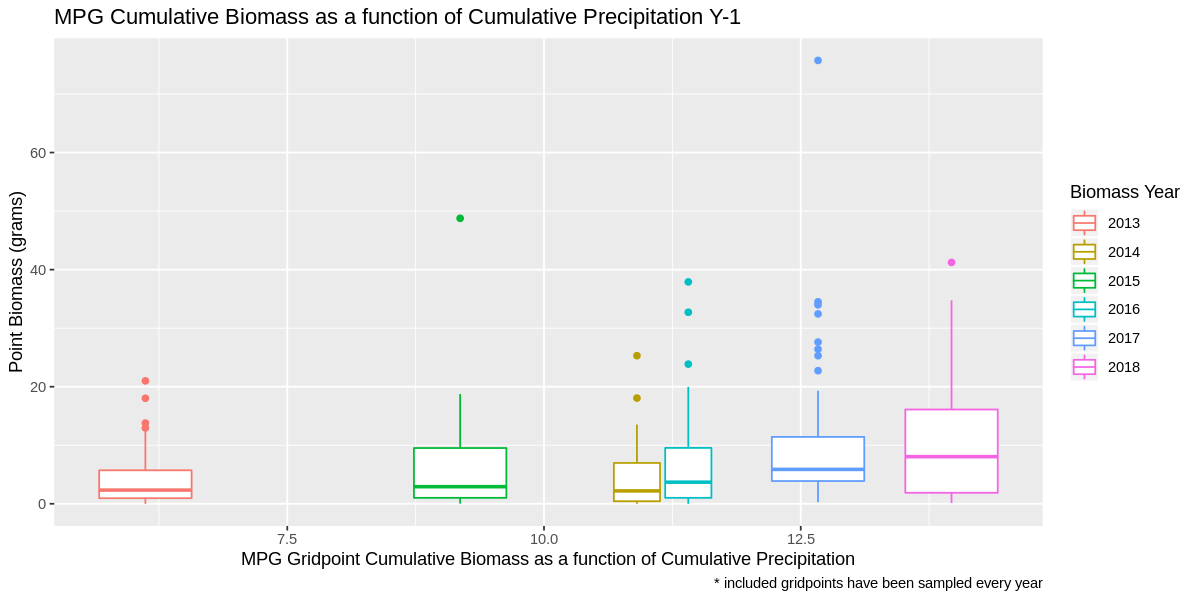

In [74]:
options(repr.plot.width=10, repr.plot.height=5)

annum_bp_consistent %>% ggplot(aes(x = mean, y = pt_avg_grams, color = as.character(year))) + 
  geom_boxplot(width = 1) +
  labs(x = "MPG Gridpoint Cumulative Biomass as a function of Cumulative Precipitation", y = "Point Biomass (grams)", colour = "Biomass Year", title = "MPG Cumulative Biomass as a function of Cumulative Precipitation Y-1",
    caption = "* included gridpoints have been sampled every year")